In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\KIRAN\OneDrive\Desktop\CSV Files\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X= df.iloc[:, 3:].values

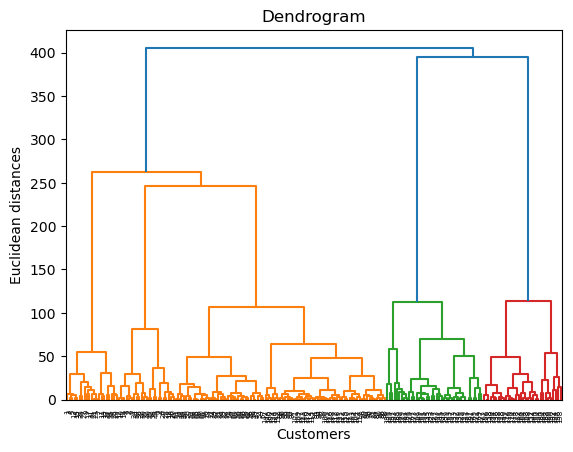

In [6]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)

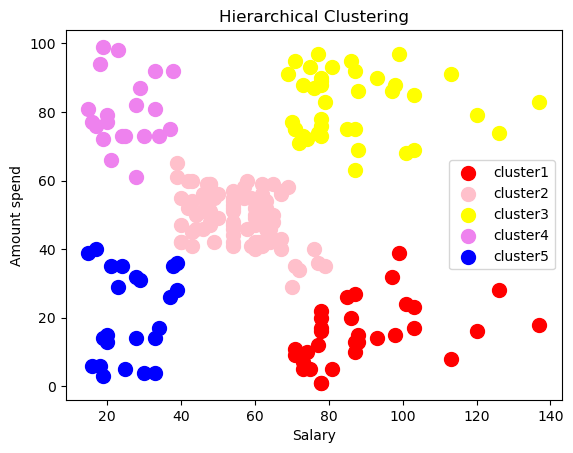

In [8]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'pink', label = 'cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'yellow', label = 'cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'violet', label = 'cluster4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'blue', label = 'cluster5')
plt.xlabel('Salary')
plt.ylabel('Amount spend')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_hc)
print('Silhouette Score for Hierarchical Clustering', score)

Silhouette Score for Hierarchical Clustering 0.5529945955148897


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

,eps,0.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [12]:
clusters = dbscan.fit_predict(X_scaled)
print('DBSCAN Clusters:', clusters)

DBSCAN Clusters: [ 2  0  1  0  2  0  1 -1  1  0 -1 -1 -1  0  1  0  2  0  2 -1  2  0  1  0
 -1 -1  2 -1  2 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  6  4  6  4
  6 -1  6  4  6  4  6  4  6  4  6  4 -1  4  6  4 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


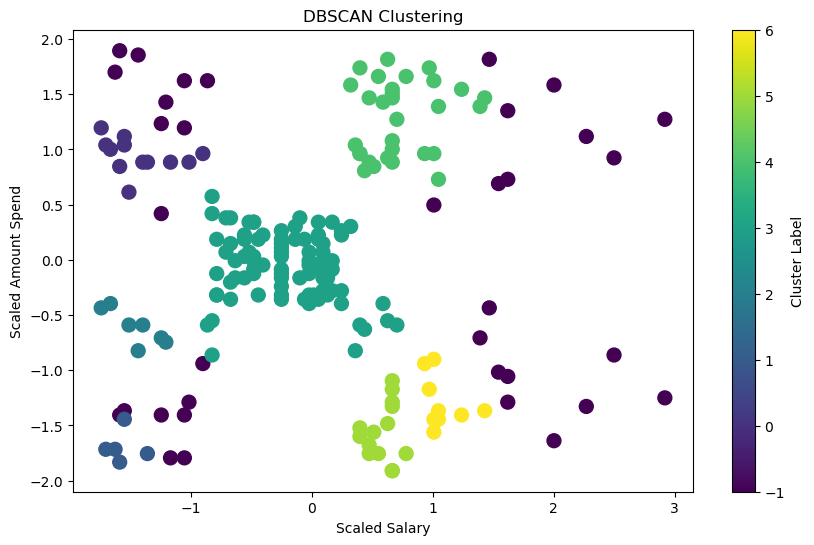

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=100)
plt.xlabel('Scaled Salary')
plt.ylabel('Scaled Amount Spend')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [14]:
score = silhouette_score(X_scaled, clusters)
print('Silhouette Score for DBSCAN Clustering', score)

Silhouette Score for DBSCAN Clustering 0.31614121976731185


In [15]:
eps_value = [0.2, 0.3, 0.5]

for eps in eps_value:
    print(f"\n Evaluating DBSCAN using eps = {eps}")

    # Apply DBSCAN
    dbscan = DBSCAN(eps = eps, min_samples = 5)
    labels = dbscan.fit_predict(X_scaled)

    # NUmber of Clusters(Ignore Noise label -1)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

    # NUmber of Noise Points
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise/len(labels)

    print(f"Number of Clusters: {n_clusters}")
    print(f"Number of Noise Points: ", {round(noise_ratio, 2)})

    # Silhouette score (only if valid)
    if n_clusters > 1:
        X_non_noise = X_scaled[labels != -1]
        labels_non_noise = labels[labels != -1]
        score = silhouette_score(X_non_noise, labels_non_noise)
        print("Silhouette score:", round(score, 3))
    else:
        print("Silhouette score: Not applicable")


 Evaluating DBSCAN using eps = 0.2
Number of Clusters: 7
Number of Noise Points:  {0.39}
Silhouette score: 0.586

 Evaluating DBSCAN using eps = 0.3
Number of Clusters: 7
Number of Noise Points:  {0.17}
Silhouette score: 0.524

 Evaluating DBSCAN using eps = 0.5
Number of Clusters: 2
Number of Noise Points:  {0.04}
Silhouette score: 0.388
